In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)


## Moreira

In [3]:

# Carregando os dados dos arquivos CSV
rf_file_path = 'data/rf_br_10y.csv'
cds_file_path = 'data/br_cds_10y.csv'

# Lendo os arquivos CSV
riskfree = pd.read_csv(rf_file_path, delimiter=";")
cdsbrasil = pd.read_csv(cds_file_path, delimiter=";")

# Extraindo as taxas de título livre de risco para anos específicos
rf_data = {
    "Ano": [2018, 2019, 2020, 2021, 2022],
    "Taxa Livre de Risco": [
        riskfree.loc[1184, 'Último'],
        riskfree.loc[932, 'Último'],
        riskfree.loc[680, 'Último'],
        riskfree.loc[426, 'Último'],
        riskfree.loc[0, 'Último']
    ]
}

# Extraindo os valores para o CDS
cds_data = {
    "Ano": [2018, 2019, 2020, 2021, 2022],
    "Taxa CDS": [
        cdsbrasil.loc[1230, "Último"] / 100,
        cdsbrasil.loc[969, "Último"] / 100,
        cdsbrasil.loc[708, "Último"] / 100,
        cdsbrasil.loc[447, "Último"] / 100,
        cdsbrasil.loc[0, "Último"] / 100
    ]
}

# Convertendo em DataFrames
rf_df = pd.DataFrame(rf_data)
cds_df = pd.DataFrame(cds_data)

# Combinando os dois DataFrames
combined_df = pd.merge(rf_df, cds_df, on="Ano")

riskfree.head()
combined_df


,Ano,Tava Livre de Risco,Taxa CDS
0,2018,10.080,2.42980
1,2019,9.250,2.70050
2,2020,6.725,1.75080
3,2021,6.878,2.08161
4,2022,11.800,3.42900


## Fer

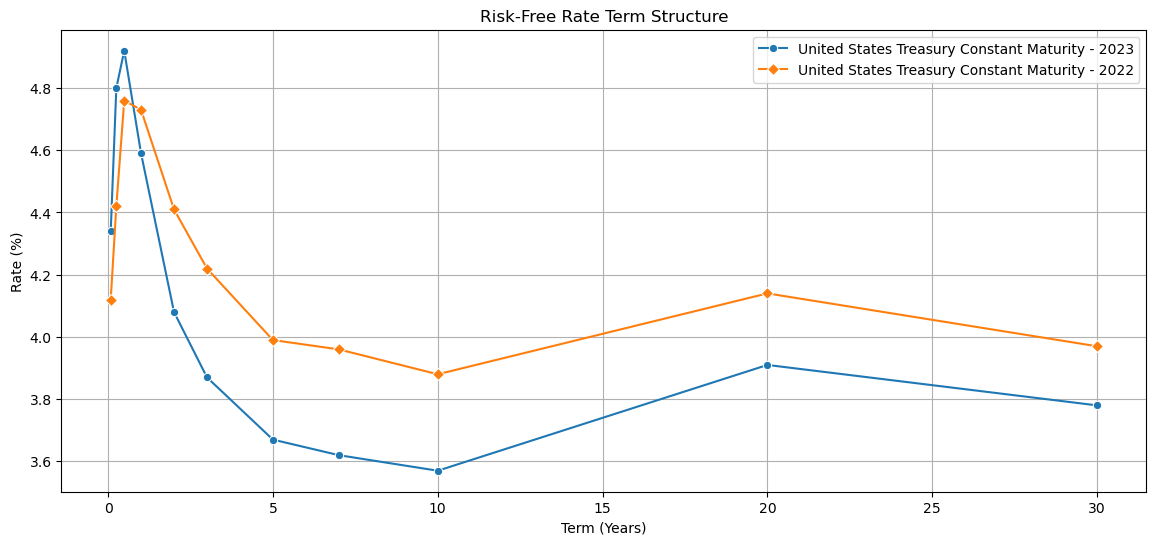

In [5]:
interest_rate_df = pd.read_csv('data/interest_rates.csv')

plt.figure(figsize=(14, 6))

sns.lineplot(data=interest_rate_df, x='Term', y='Rates 2023', marker='o', color='#1f77b4', 
             label='United States Treasury Constant Maturity - 2023')
sns.lineplot(data=interest_rate_df, x='Term', y='Rates 2022', marker='D', color='#ff7f0e',
             label='United States Treasury Constant Maturity - 2022')


plt.title('Risk-Free Rate Term Structure')
plt.xlabel('Term (Years)')
plt.ylabel('Rate (%)')
plt.grid(True)

plt.show()


In [39]:
# Data for each component
ebitda = np.array([1.859, 1.839, 5.222, 3.833, 3.649, 5.894, 7.316, 7.784, 8.291, 8.827])
taxes = np.array([-1.616, -1.092, -0.925, -0.677, -0.393, -1.714, -2.093, -2.141, -2.197, -2.256])
change_in_working_capital = np.array([-3.899, 0.357, 0.366, -3.021, 0.059, -3.511, -1.507, -0.605, -0.647, -0.682])
capex = np.array([-0.196, -0.373, -0.581, -2.415, -2.011, -2.669, -3.091, -3.256, -3.432, -3.617])

# Calculate the Cash Flow (FCFF) for each year
cash_flow = ebitda + taxes + change_in_working_capital + capex

# Discount factors and periods of discount (assuming the periods start from 0.5 to 4.5 with 1 year increments)
discount_periods = np.array([0.5, 1.5, 2.5, 3.5, 4.5])
discount_rate = 0.104  # 10.4% discount rate
# Discount factors calculated using the formula: 1 / (1 + r)^t
discount_factors = 1 / (1 + discount_rate) ** discount_periods

# Calculate the present value of the cash flows for the years where discount factors are given
present_values = cash_flow[5:10] * discount_factors

# Create a DataFrame to display the data neatly
fcff_df = pd.DataFrame({
    'Ano': np.arange(2018, 2028),
    'EBITDA': ebitda,
    'IRPJ/CSLL': taxes,
    'Variação do capital de giro': change_in_working_capital,
    'CAPEX': capex,
    'Fluxo de Caixa': cash_flow,
    'Fator de desconto': np.append(np.full(5, np.nan), discount_factors),  
    # 'Present Value': np.append(np.full(5, np.nan), present_values)  
})

fcff_df


,Ano,EBITDA,IRPJ/CSLL,Variação do capital de giro,CAPEX,Fluxo de Caixa,Fator de desconto
0,2018,1.859,-1.616,-3.899,-0.196,-3.852,NaN
1,2019,1.839,-1.092,0.357,-0.373,0.731,NaN
2,2020,5.222,-0.925,0.366,-0.581,4.082,NaN
3,2021,3.833,-0.677,-3.021,-2.415,-2.280,NaN
4,2022,3.649,-0.393,0.059,-2.011,1.304,NaN
5,2023,5.894,-1.714,-3.511,-2.669,-2.000,0.951734
6,2024,7.316,-2.093,-1.507,-3.091,0.625,0.862078
7,2025,7.784,-2.141,-0.605,-3.256,1.782,0.780867
8,2026,8.291,-2.197,-0.647,-3.432,2.015,0.707307
9,2027,8.827,-2.256,-0.682,-3.617,2.272,0.640677
